<a href="https://colab.research.google.com/github/yashsolanki162003/Celebel_Kaggle_dataset/blob/main/Celebel_Kaggle_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [ ]:
df=pd.read_parquet('train.parquet')
df.head()

,Date,X1,X2,X3,X4,X5,target
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0


In [ ]:
df.columns

Index(['Date', 'X1', 'X2', 'X3', 'X4', 'X5', 'target'], dtype='object')

In [ ]:
df.shape

(1639424, 7)

In [ ]:
df.duplicated().sum()

np.int64(57315)

In [ ]:
df.isnull().sum()

,0
Date,0
X1,0
X2,0
X3,0
X4,0
X5,0
target,0


In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(1582109, 7)

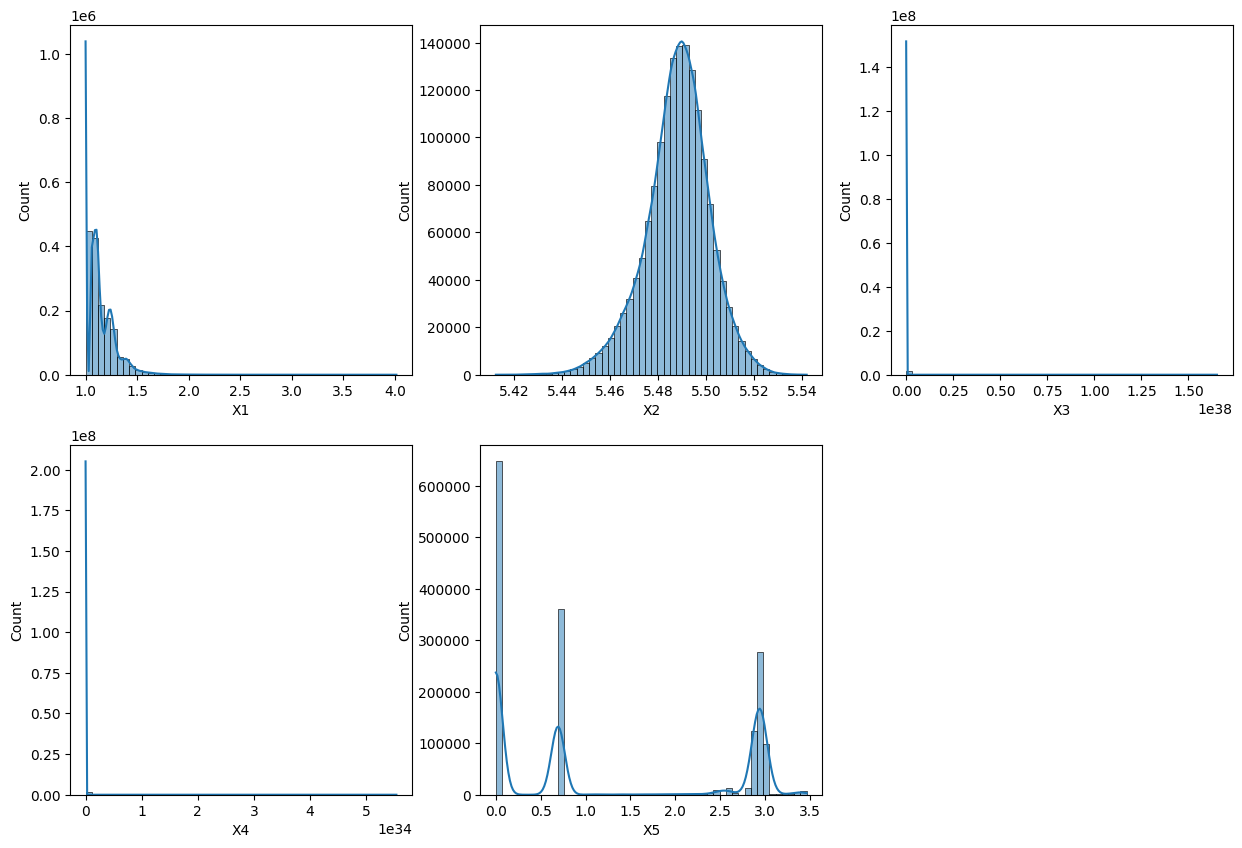

In [ ]:
plt.figure(figsize=(15,10))

columns=['X1','X2','X3','X4','X5']
j=1
for i in columns:
    plt.subplot(2,3,j)
    sns.histplot(df[i],kde=True,bins=50)
    j+=1

In [ ]:
df = df.assign(
    year=df['Date'].dt.year,
    month=df['Date'].dt.month
)
df

,Date,X1,X2,X3,X4,X5,target,year,month
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0,2020,12
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1,2020,12
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1,2020,12
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1,2020,12
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0,2020,12
...,...,...,...,...,...,...,...,...,...
1639419,2024-11-26,1.000000,5.482346,1.0,1.000000,0.000000,0,2024,11
1639420,2024-11-26,1.000000,5.486580,1.0,1.000000,0.000000,0,2024,11
1639421,2024-11-26,1.000000,5.484797,1.0,1.000000,0.000000,0,2024,11
1639422,2024-11-26,1.000000,5.483551,1.0,1.000000,0.000000,0,2024,11


In [ ]:
df['day'] = df['Date'].dt.day
df

,Date,X1,X2,X3,X4,X5,target,year,month,day
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0,2020,12,16
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1,2020,12,16
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1,2020,12,16
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1,2020,12,16
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0,2020,12,16
...,...,...,...,...,...,...,...,...,...,...
1639419,2024-11-26,1.000000,5.482346,1.0,1.000000,0.000000,0,2024,11,26
1639420,2024-11-26,1.000000,5.486580,1.0,1.000000,0.000000,0,2024,11,26
1639421,2024-11-26,1.000000,5.484797,1.0,1.000000,0.000000,0,2024,11,26
1639422,2024-11-26,1.000000,5.483551,1.0,1.000000,0.000000,0,2024,11,26


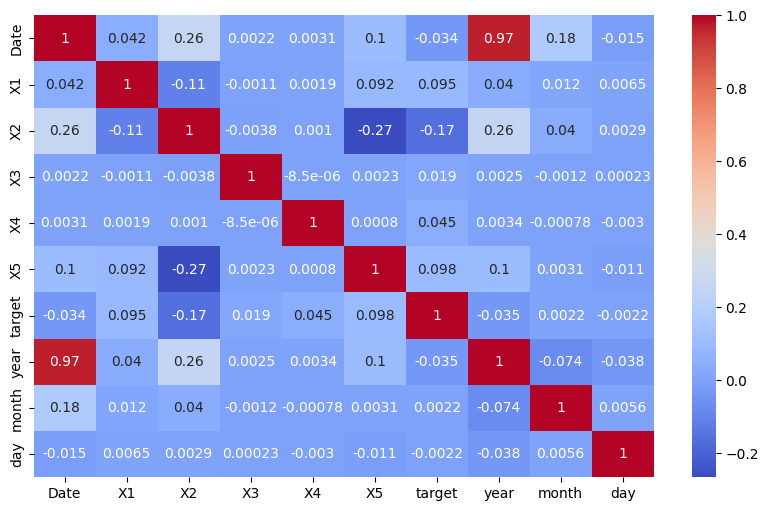

In [ ]:
df['target']=df['target'].astype(int)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df=df.drop('Date',axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('target', axis=1)  # replace 'target' with your column
y = df['target']

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)

,0
X4,0.277089
X3,0.174004
X2,0.164466
X1,0.121091
day,0.103684
month,0.070023
X5,0.056328
year,0.033314


In [ ]:
new_df=df[['X4','X3','X2','X1','day','target']]
new_df.head()

,X4,X3,X2,X1,day,target
0,2.718282,1.0,5.463154,1.518921,16,0
1,2.718282,1.0,5.458010,1.546509,16,1
2,7.389056,1.0,5.456560,1.645427,16,1
3,2.718282,1.0,5.458479,1.652022,16,1
4,2.718282,1.0,5.466709,1.695538,16,0


In [ ]:
test_df=pd.read_parquet('test.parquet')
test_df.head()

,ID,Date,X1,X2,X3,X4,X5
0,0,2020-12-16,1.685395,5.463917,1.0,7.389056,2.890372
1,1,2020-12-16,1.488844,5.454936,1.0,7.389056,2.890372
2,2,2020-12-16,1.164160,5.471136,1.0,1.000000,2.890372
3,3,2020-12-16,1.000000,5.467385,1.0,1.000000,2.890372
4,4,2020-12-16,1.000000,5.453995,1.0,1.000000,2.833213


In [ ]:
test_df = test_df.assign(
    year=test_df['Date'].dt.year,
    month=test_df['Date'].dt.month,
    day=test_df['Date'].dt.day
)

In [ ]:
test_df=test_df[['X4','X3','X2','X1','day','X5','month','year']]
test_df.head()

,X4,X3,X2,X1,day,X5,month,year
0,7.389056,1.0,5.463917,1.685395,16,2.890372,12,2020
1,7.389056,1.0,5.454936,1.488844,16,2.890372,12,2020
2,1.000000,1.0,5.471136,1.164160,16,2.890372,12,2020
3,1.000000,1.0,5.467385,1.000000,16,2.890372,12,2020
4,1.000000,1.0,5.453995,1.000000,16,2.833213,12,2020


In [ ]:
new_df=df[['X4','X3','X2','X1','day','target','X5','month','year']]
new_df.head()

,X4,X3,X2,X1,day,target,X5,month,year
0,2.718282,1.0,5.463154,1.518921,16,0,2.890372,12,2020
1,2.718282,1.0,5.458010,1.546509,16,1,2.833213,12,2020
2,7.389056,1.0,5.456560,1.645427,16,1,2.890372,12,2020
3,2.718282,1.0,5.458479,1.652022,16,1,2.890372,12,2020
4,2.718282,1.0,5.466709,1.695538,16,0,2.890372,12,2020


In [ ]:
from sklearn.model_selection import train_test_split

X = new_df.drop(columns=['target'])
y = new_df['target']

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_leaf=2,
    class_weight={0:1, 1:4},
    n_jobs=-1,
    random_state=42
)

rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_val)[:,1]
from xgboost import XGBClassifier

neg = (y_train==0).sum()
pos = (y_train==1).sum()
scale_pos_weight = neg/pos

xgb_model = XGBClassifier(
    n_estimators=800,
    max_depth=7,
    learning_rate=0.03,
    subsample=0.85,
    colsample_bytree=0.85,
    min_child_weight=5,
    gamma=2,
    reg_alpha=0.5,
    reg_lambda=1.0,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_probs = xgb_model.predict_proba(X_val)[:,1]
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.03,
    num_leaves=128,
    max_depth=-1,
    subsample=0.9,
    colsample_bytree=0.9,
    class_weight={0:1, 1:int(scale_pos_weight)},
    random_state=42
)

lgb_model.fit(X_train, y_train)
lgb_probs = lgb_model.predict_proba(X_val)[:,1]


ensemble_probs = (0.2 * rf_probs) + (0.4 * xgb_probs) + (0.4 * lgb_probs)


import numpy as np
from sklearn.metrics import f1_score, classification_report

thresholds = np.arange(0.4, 0.95, 0.03)

best_t = 0
best_f1 = 0

for t in thresholds:
    preds = (ensemble_probs > t).astype(int)
    score = f1_score(y_val, preds)
    if score > best_f1:
        best_f1 = score
        best_t = t

print("Initial Best Threshold:", best_t)
print("Initial Best F1:", best_f1)

thresholds = np.arange(best_t-0.05, best_t+0.05, 0.01)

best_t2 = best_t
best_f12 = best_f1

for t in thresholds:
    preds = (ensemble_probs > t).astype(int)
    score = f1_score(y_val, preds)
    if score > best_f1:
        best_f1 = score
        best_t = t

print("Best Threshold:", best_t)
print("Best Ensemble F1:", best_f1)

final_preds = (ensemble_probs > best_t).astype(int)
print("\nFinal Classification Report:\n")
print(classification_report(y_val, final_preds))


[LightGBM] [Info] Number of positive: 11226, number of negative: 1254461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 743
[LightGBM] [Info] Number of data points in the train set: 1265687, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498325 -> initscore=-0.006699
[LightGBM] [Info] Start training from score -0.006699
Best Threshold: 0.8500000000000004
Best Ensemble F1: 0.7616029822926375

Final Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313615
           1       0.80      0.73      0.76      2807

    accuracy                           1.00    316422
   macro avg       0.90      0.86      0.88    316422
weighted avg       1.00      1.00      1.00    316422



In [ ]:
X = new_df.drop(columns=['target'])
y = new_df['target']

# Random Forest
rf_model.fit(X, y)

# XGBoost
xgb_model.fit(X, y)

# LightGBM
lgb_model.fit(X, y)

rf_test_probs  = rf_model.predict_proba(test_df)[:,1]
xgb_test_probs = xgb_model.predict_proba(test_df)[:,1]
lgb_test_probs = lgb_model.predict_proba(test_df)[:,1]

ensemble_test_probs = (
    0.2 * rf_test_probs +
    0.4 * xgb_test_probs +
    0.4 * lgb_test_probs
)

best_threshold = 0.85   # use your tuned value

test_predictions = (ensemble_test_probs > best_threshold).astype(int)

submission = pd.DataFrame({
    "id": test_df.index,   # or replace with test_df['id']
    "target": test_predictions
})

submission.to_csv("submission.csv", index=False)
print("submission.csv created successfully!")


[LightGBM] [Info] Number of positive: 14033, number of negative: 1568076
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 742
[LightGBM] [Info] Number of data points in the train set: 1582109, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498334 -> initscore=-0.006663
[LightGBM] [Info] Start training from score -0.006663
submission.csv created successfully!


In [ ]:
data=pd.read_csv('submission.csv')
data.columns

Index(['id', 'target'], dtype='object')